Trubleshooting

Allocation of 62720000 exceeds 10% of system memory

[Reference link](https://stackoverflow.com/a/55246936/7270469)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import np_utils

%matplotlib inline

Using TensorFlow backend.


In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [4]:
X_train.shape[0], X_test.shape[0]

(60000, 10000)

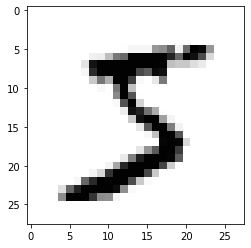

In [5]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

`28 X 28` pixels img

brightness `0 ~ 255`

```
28 X 28 = 784
```

784 개의 속성을 이용해 0 ~ 9 숫자를 맞추는 것

In [6]:
for x in X_train[0]:
    for i in x:
        print('%3.0f' % i, end=" ")
    print('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 

  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 

  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 

  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0 

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

28 x 28 로 이루어진 2차원 을 1차원 784로 변경하고

0 ~ 1 값으로 정규화

In [8]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [9]:
Y_class_train[0]

5

In [10]:
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

One hot coding

In [11]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

sigmoid : s 자 형태 함수로 특정 임계치를 넘었을 때 반응, 0 과 1 구분에 활용

> 계속 곱해가면 0에 수렵하는 현상이 나타남

relu : 0 보다 작은 값은 모두 0, 다른 경우엔 모두 값 그대로 반환

> 히든 레이어에서 사용하고, 결과 함수로 sigmoid 사용

softmax : 합이 1인데 확률적 분류 결과를 더 극적으로 나타냄

> 지수 그래프

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
MODEL_DIR = './number_model/'

In [16]:
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [17]:
modelpath=f'{MODEL_DIR}' + '{epoch:02d}-{val_loss:.4f}.hdf5'
modelpath

'./number_model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [18]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [19]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15302, saving model to ./number_model/01-0.1530.hdf5

Epoch 00002: val_loss improved from 0.15302 to 0.10234, saving model to ./number_model/02-0.1023.hdf5

Epoch 00003: val_loss improved from 0.10234 to 0.08616, saving model to ./number_model/03-0.0862.hdf5

Epoch 00004: val_loss improved from 0.08616 to 0.07354, saving model to ./number_model/04-0.0735.hdf5

Epoch 00005: val_loss improved from 0.07354 to 0.06926, saving model to ./number_model/05-0.0693.hdf5

Epoch 00006: val_loss improved from 0.06926 to 0.06690, saving model to ./number_model/06-0.0669.hdf5

Epoch 00007: val_loss improved from 0.06690 to 0.06641, saving model to ./number_model/07-0.0664.hdf5

Epoch 00008: val_loss improved from 0.06641 to 0.05853, saving model to ./number_model/08-0.0585.hdf5

Epoch 00009: val_loss did not improve from 0.05853

Epoch 00010: val_loss did not improve from 0.05853

Epoch 00011: val_loss did not improve from 0.05853

Epoch 00012: val_loss d

In [20]:
model.evaluate(X_test, Y_test)[1]

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9801

In [21]:
y_vloss = history.history['val_loss']
y_vloss

[0.15301917722448707,
 0.1023363140411675,
 0.08616238786373287,
 0.07354032746749,
 0.06926156770437956,
 0.0669020560150966,
 0.06640876851044596,
 0.05853370326571167,
 0.06111606994381873,
 0.05870094619342126,
 0.06056063853757223,
 0.060200754096149466,
 0.061551100840006256,
 0.06379552879079711,
 0.06093963694802369,
 0.0611677944145049,
 0.07432019795916858,
 0.07613758664607304]

In [22]:
y_loss = history.history['loss']
y_loss

[0.3015532381335894,
 0.1232751625093321,
 0.08233893929049373,
 0.059029636265089114,
 0.04394000695397456,
 0.03328579106057684,
 0.02846644868453344,
 0.021010020185882848,
 0.01658502981842806,
 0.011810712876031176,
 0.008988046947245797,
 0.008109257645361747,
 0.006701042043666045,
 0.004382672121476692,
 0.002860367421914513,
 0.0025326430851904053,
 0.007415073847514577,
 0.00738667977876806]

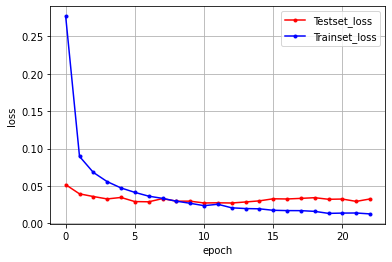

In [41]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

학습 오차가 줄어들고 테스트 데이터의 오차가 늘어나기 전 최적의 상태에서 정지됨

In [25]:
del model

# CNN 

_특징 추출을 위해 커널을 추가한 신경망_

- 입력 이미지로부터 부분적 특징을 추출
- 변환 커널을 생성한 후 이미지에 곱하면 또 다른 결과가 나오게 됨 (새로운 층 컨볼루션 or 합성곱)
- 위 같은 커널을 여러개 생성시 여러 컨볼루션 층 생성가능

> 즉 여러개의 커널을 만들어서 특징을 추출한 컨볼루션 들로 이루어진 다양한 층을 만들어낼 수 있음\

ex)

- 4 x 4 original data

|   |   |   |   |
|:-:|:-:|:-:|:-:|
| 1  | 0  | 1  |  0 |
| 0  | 1  | 1  | 0  |
| 0  | 0  | 1  | 1  |
| 0  | 0  | 1  |  0 |

<div align="center">
+
    </div>

- 2 x 2 kernel

|   |   |
|:-:|:-:|
| x1  | x0  |
| x0  | x1  |

<div align="center">
=
    </div>

- 3 x 3 Convolution

|   |   |   |
|:-:|:-:|:-:|
| 2  | 1  | 1  |
| 0  | 2  | 2  |
| 0  | 1  | 1  |

## 사용방법

이제까지 노드로 `Dense` 를 사용했다면

컨볼루션은 `Conv2D` 를 사용

```
Conv2D(커널 수, kernel_size=(커널 사이즈, 행,열), input_dim=(입력 차원 행,열,깊이), activation=활성함수)
```

## MaxPooling

이미지 특징을 추출했지만 그 차원이 여전히 클때 축소시키는 방법 중 하나

- 4 x 4 original data

|   |   |   |   |
|:-:|:-:|:-:|:-:|
| 1  | 0  | 1  |  0 |
| 0  | 4  | 2  | 0  |
| 0  | 1  | 6  | 1  |
| 0  | 0  | 1  |  0 |

위와 같은 상태 일때, 4구역으로 2 x 2 씩 나눈다고 하면,

|   |   |
|:-:|:-:|
| 1  | 0  |
| 0  | 4  |

|   |   |
|:-:|:-:|
| 1  | 0  |
| 2  | 0  |

|   |   |
|:-:|:-:|
| 0  | 1  |
| 0  | 0  |

|   |   |
|:-:|:-:|
| 6  | 1  |
| 1  | 0  |

위 4가지 형태로 나올 것이고 각 형태에서 가장 큰 후보들만 선정하여 다시 합치면,

|   |   |
|:-:|:-:|
| 4  | 2  |
| 1  | 6  |

로 축소 시킬 수 있음

```
MaxPooling2D(pool_size=N)
```

형태로 구현

## Drop out

노드 혹은 층이 많다고 학습이 잘 되어지는 것이 아님,

과적합을 피하기 위해 사용되어지는 방법으로 은닉층의 노드 중 일부를 임의로 비활성화 시킴

```
Dropout(0.25)
```

형태로 구현하며, 25% 를 끄게 됨

## ETC

```
Flatten()
```

함수로 2차원 형태인 이미지를 1차원으로 변환

## CNN 으로 머신러닝 과정

X1 ~ Xn (28 x 28 == 784 속성) 데이터

▼

32 개 커널, 3x3 형태

▼

64 개 커널, 3x3 형태

▼

MaxPooling, 2 만큼 확인

▼

Drop out, 25%

▼

Flatten

▼

128 노드

▼

Drop out, 50%

▼

softmax, 10 개 결과

In [26]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [27]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [28]:
Y_train = np_utils.to_categorical(Y_class_train)
Y_test = np_utils.to_categorical(Y_class_test)

In [29]:
model2D = Sequential()
model2D.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model2D.add(Conv2D(64, (3, 3), activation='relu'))
model2D.add(MaxPooling2D(pool_size=2))
model2D.add(Dropout(0.25))
model2D.add(Flatten())
model2D.add(Dense(128, activation='relu'))
model2D.add(Dropout(0.5))
model2D.add(Dense(10, activation='softmax'))

In [30]:
model2D.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [31]:
model2D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
modelpath

'./number_model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [33]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [34]:
history2D = model2D.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05182, saving model to ./number_model/01-0.0518.hdf5

Epoch 00002: val_loss improved from 0.05182 to 0.03954, saving model to ./number_model/02-0.0395.hdf5

Epoch 00003: val_loss improved from 0.03954 to 0.03596, saving model to ./number_model/03-0.0360.hdf5

Epoch 00004: val_loss improved from 0.03596 to 0.03274, saving model to ./number_model/04-0.0327.hdf5

Epoch 00005: val_loss did not improve from 0.03274

Epoch 00006: val_loss improved from 0.03274 to 0.02921, saving model to ./number_model/06-0.0292.hdf5

Epoch 00007: val_loss improved from 0.02921 to 0.02891, saving model to ./number_model/07-0.0289.hdf5

Epoch 00008: val_loss did not improve from 0.02891

Epoch 00009: val_loss did not improve from 0.02891

Epoch 00010: val_loss did not improve from 0.02891

Epoch 00011: val_loss improved from 0.02891 to 0.02735, saving model to ./number_model/11-0.0273.hdf5

Epoch 00012: val_loss did not improve from 0.02735

Epoch 00013: val_loss 

In [35]:
model2D.evaluate(X_test, Y_test)[1]

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9923

In [36]:
y_vloss = history2D.history['val_loss']
y_loss = history2D.history['loss']

In [37]:
x_len = np.arange(len(y_loss))
x_len

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

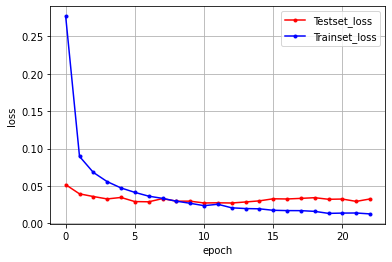

In [40]:
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 실제 결과 확인

In [50]:
np.argmax(Y_test[0])

7

In [51]:
np.argmax(model2D.predict(X_test)[0])

7

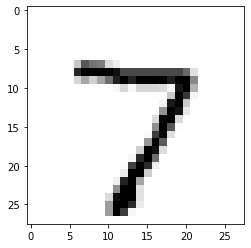

In [52]:
plt.imshow(X_test[0], cmap='Greys')
plt.show()